# Лабораторная работа № 1. Санников Алексей. 15-АС.

# Цель работы -  получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.

# Вариант № 4. Дожди в Индии.

In [2]:
import pandas as pd
import numpy as NP
%matplotlib  inline
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('rainfall in india 1901-2015.csv')

Содержание исходной таблицы (количество объектов, количество их признаков)

In [9]:
df.shape

(4116, 19)

Оставим записи в таблице, которые не имеют пропусков данных

In [3]:
df = df.dropna()
print(df.shape)

(4090, 19)


Убедимся, что пропусков нет (в каждом признаке должно быть по 4090 записей)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4090 non-null object
YEAR           4090 non-null int64
JAN            4090 non-null float64
FEB            4090 non-null float64
MAR            4090 non-null float64
APR            4090 non-null float64
MAY            4090 non-null float64
JUN            4090 non-null float64
JUL            4090 non-null float64
AUG            4090 non-null float64
SEP            4090 non-null float64
OCT            4090 non-null float64
NOV            4090 non-null float64
DEC            4090 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4090 non-null float64
Mar-May        4090 non-null float64
Jun-Sep        4090 non-null float64
Oct-Dec        4090 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 639.1+ KB


In [12]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# 1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.


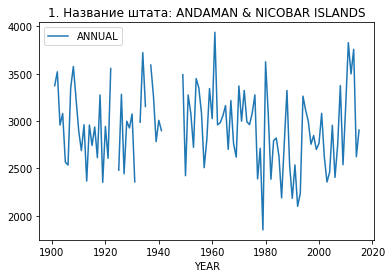

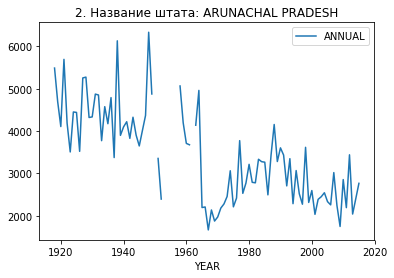

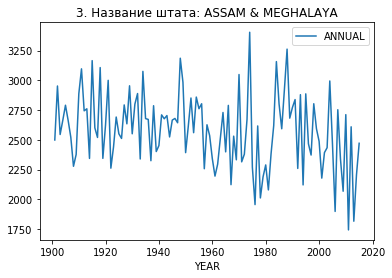

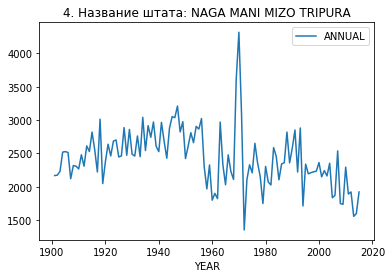

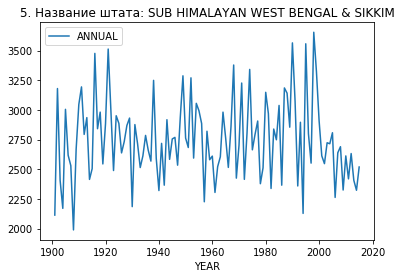

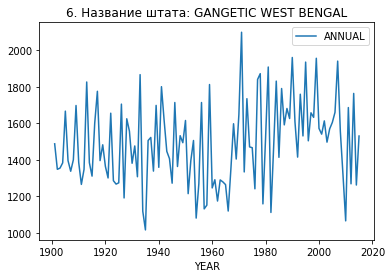

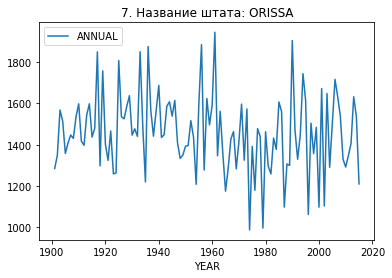

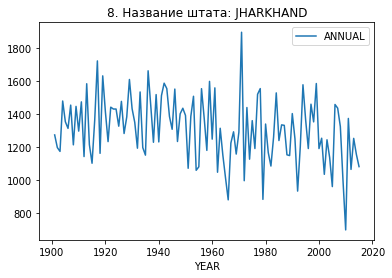

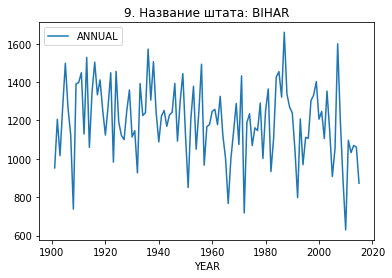

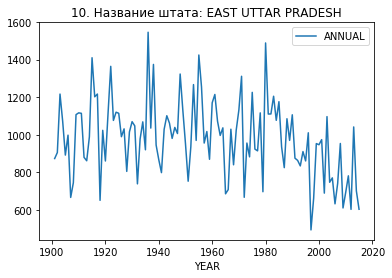

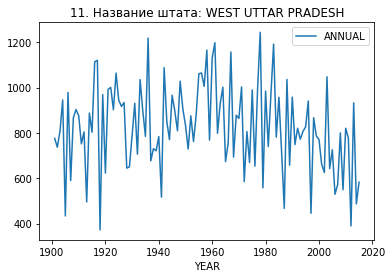

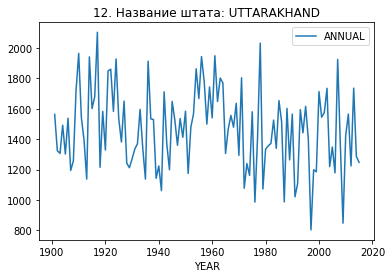

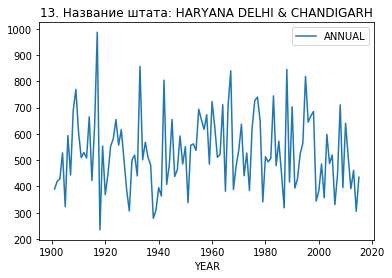

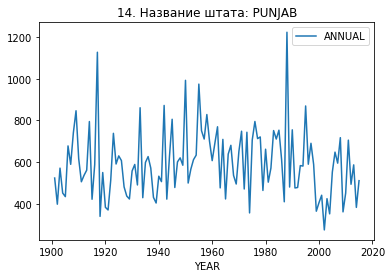

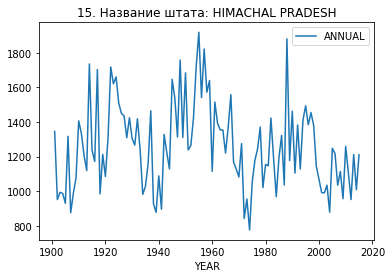

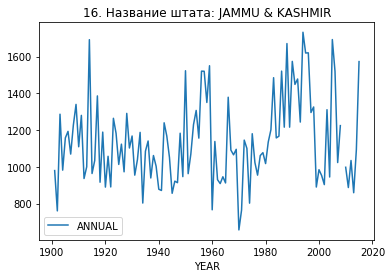

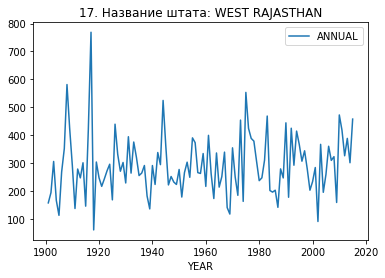

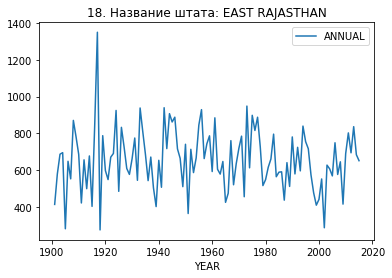

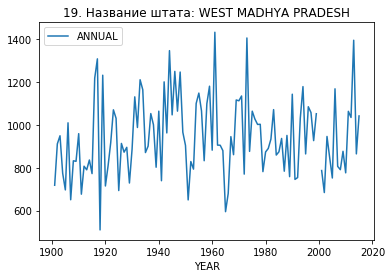

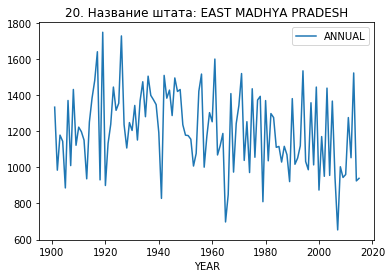

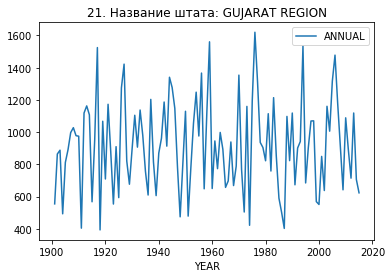

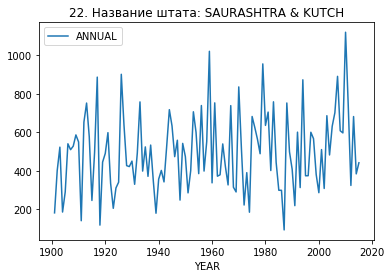

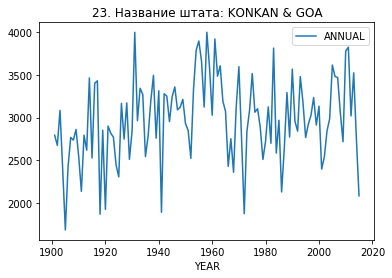

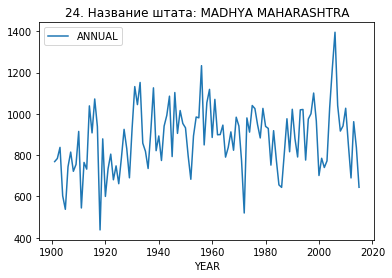

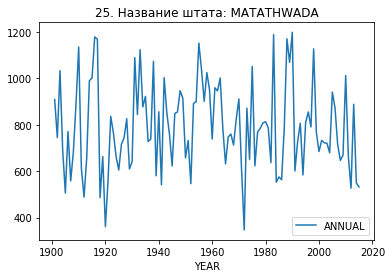

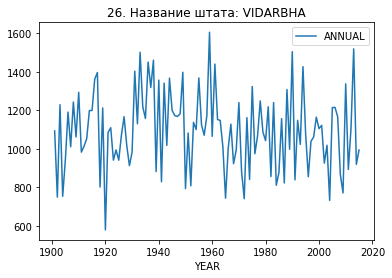

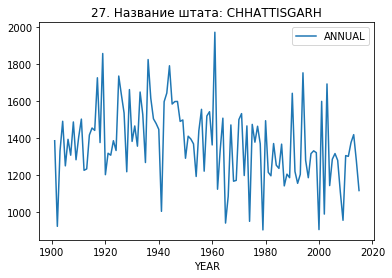

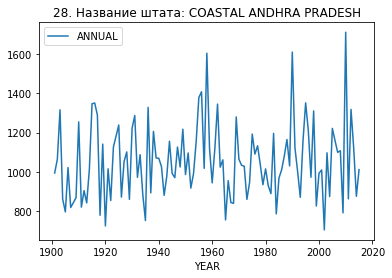

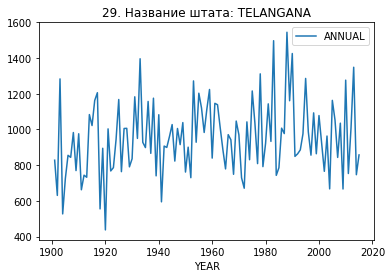

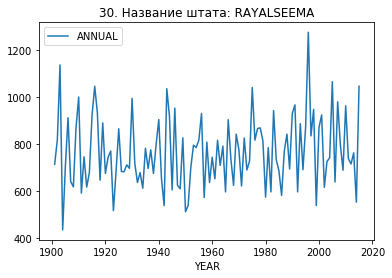

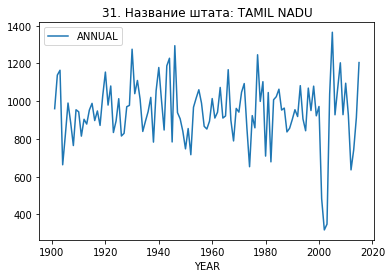

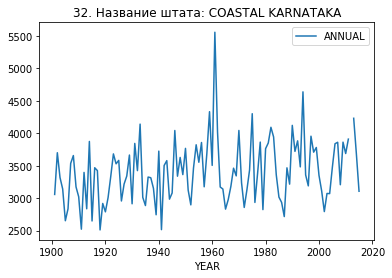

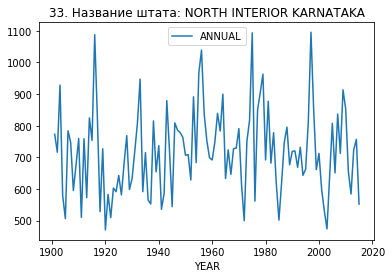

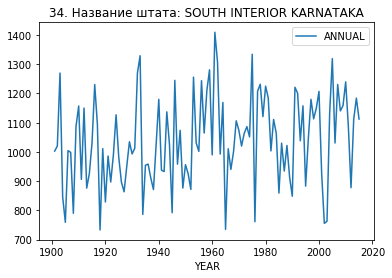

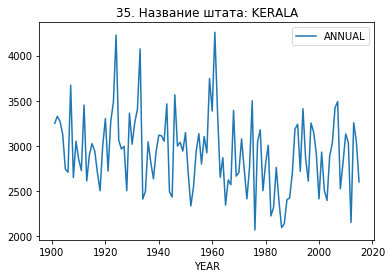

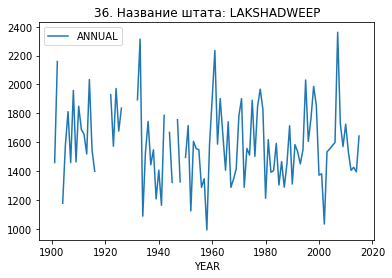

In [12]:
arrSD1 = tuple(df['SUBDIVISION'].unique())
for i in range(0,len(arrSD1)):
    df1 = df[['SUBDIVISION','YEAR','ANNUAL']]
    df1 = df1[df1['SUBDIVISION'] == arrSD1[i]]  
    df1.plot(x='YEAR', y='ANNUAL', title=str(i+1) + ". Название штата: " + str(arrSD1[i]))
    plt.show()

Вывод: исходя из полученных графиков можно сделать вывод, что количество осадков, в разных шатах за выборку последних лет достаточно сильно отличаются друг от друга. Полученные графики помогают наглядно визуализировать данную информацию.

# 2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.

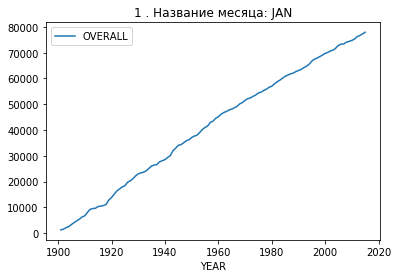

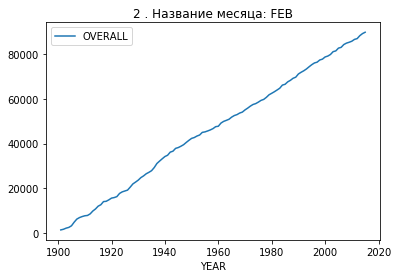

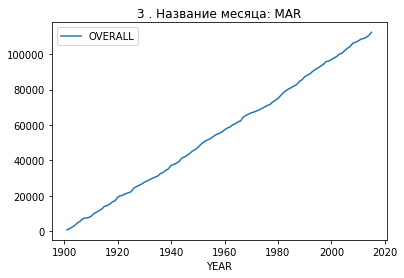

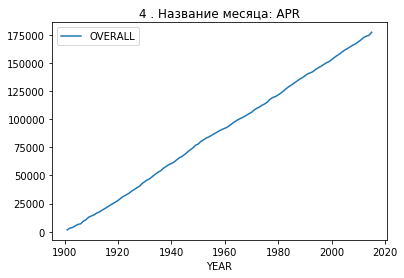

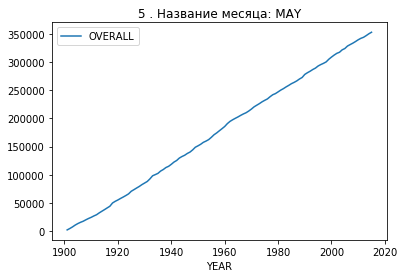

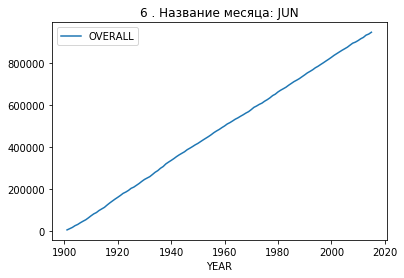

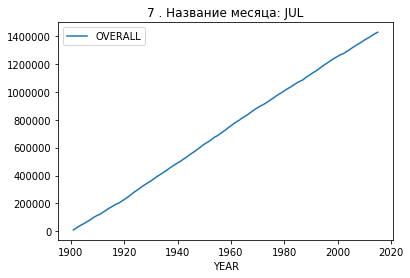

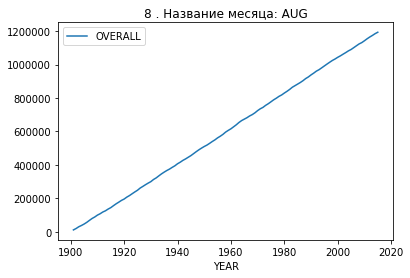

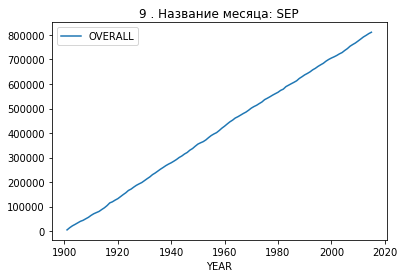

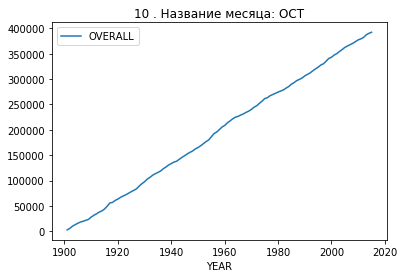

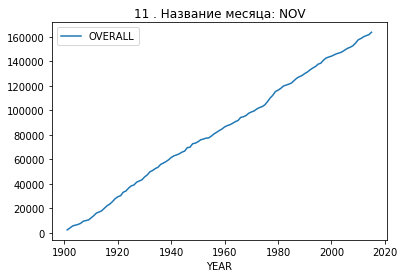

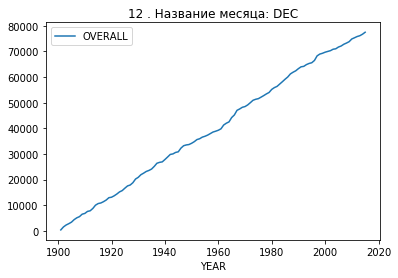

In [13]:
for i in range(2,14):
    df2 = df.iloc[:,[1,i]]
    res2 = 0
    lst21 = []
    lst22 = []
    for j in range(df2[df2.columns[0]].min(),(df2[df2.columns[0]].max())+1):
        df22 = df2.copy()
        df22 = df22[df22['YEAR'] == j]
        res2 += df22[df22.columns[1]].sum()
        lst21.append(j)
        lst22.append(res2)
    tup21 = ('YEAR',lst21)
    tup22 = ('OVERALL',lst22)
    tmp2 = dict([tup21, tup22])
    df2tmp = pd.DataFrame(tmp2)
    df2tmp.plot(x='YEAR', y='OVERALL', title = str(i-1) + " . Название месяца: " + str(df2.columns[1]))
    plt.show()

Вывод: т.к. куммулятивная кривая количества осадков по месяцам данной выборки имеет примерно линейный закон распределения, то ежегодно в рассматриваемых штатах выпадает примерно равное количество осадков.

# 3. Постройте графики количества осадков по штатам, используйте boxplot. Сделайте выводы по построенным графикам.

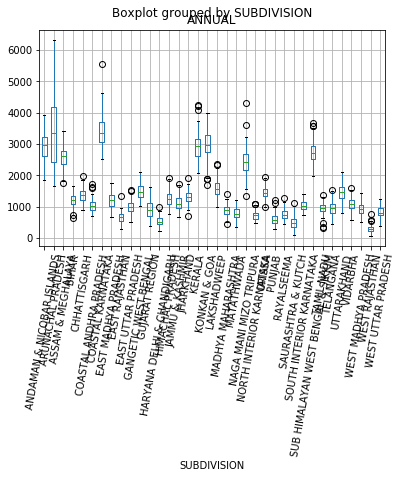

In [26]:
df.boxplot(column='ANNUAL',by='SUBDIVISION',rot=80)
plt.show()

Вывод: был построен график количества осадков по штатам, использую функцию boxplot. График данной функции имеет ряд преимуществ: с помощью него можно однозначно определить медиану выборки, верхний и нижний квантили, выбросы и максимальное и минимальное значение рассматриваемой выборки для каждых штатов, находящихся в исходной таблице.

# 4. Определите штаты, для которых количество осадков минимально и максимально.

In [22]:
df4 = df.groupby('SUBDIVISION')['ANNUAL'].sum().sort_values()
print("Minimum precipitation: " + str(df4.index[0]) + "\nMaximum precipitation: " + str(df4.index[len(df4)-1]))

Minimum precipitation: WEST RAJASTHAN
Maximum precipitation: COASTAL KARNATAKA


Вывод: минимальное количество осадков зафиксированно в штате WEST RAJASTHAN; максимальное - в COASTAL KARNATAKA.

# 5. Выведите уникальные имена штатов и территорий Индии.

In [17]:
print(df['SUBDIVISION'].unique())

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


Вывод: были получены уникальные названия штатов, расположенных на территории Индии.

# 6. Проверьте согласованность данных. Определите количество лет наблюдений для каждого штата.

In [18]:
df.groupby(['SUBDIVISION'])[['YEAR']].count()

,YEAR
SUBDIVISION,
ANDAMAN & NICOBAR ISLANDS,104
ARUNACHAL PRADESH,91
ASSAM & MEGHALAYA,115
BIHAR,115
CHHATTISGARH,115
COASTAL ANDHRA PRADESH,115
COASTAL KARNATAKA,114
EAST MADHYA PRADESH,115
EAST RAJASTHAN,115


Вывод: данные являются согласованными, т. к. количество лет наблюдений для всех штатов одинаковое (115 лет) за исключением нескольких штатов.

# 7. Определите штат с наименьшим количеством наблюдений

In [17]:
df7 = df.groupby('SUBDIVISION')[['ANNUAL']].count().sort_values(by='ANNUAL')
print("The smallest number of observations: " + str(df7['ANNUAL'][0]) + " year in " + str(df7.index[0]) + " state.")

The smallest number of observations: 91 year in ARUNACHAL PRADESH state.


Вывод: штат с наименьшим количеством наблюдений - ARUNACHAL PRADESH (91 год)

# 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [15]:
df8 = df.copy()
def func1(self):
    return (self['JUN'] + self['JUL'] + self['AUG'])/3
df8['Average weather in summer'] = df8.apply(func1,axis=1)
df8.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Average weather in summer
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,454.566667
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,506.566667
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,511.666667
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,385.733333
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,442.633333


Вывод: был добавлен признак (Среднее количество осадков в штатах Индии летом), являющийся суммой других признаков, содержащихся в исходной таблице.

# 9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции.  Оцените значение p-value.

          NOV       MAR
NOV  1.000000  0.008814
MAR  0.008814  1.000000
          NOV       MAR
NOV  1.000000  0.142525
MAR  0.142525  1.000000


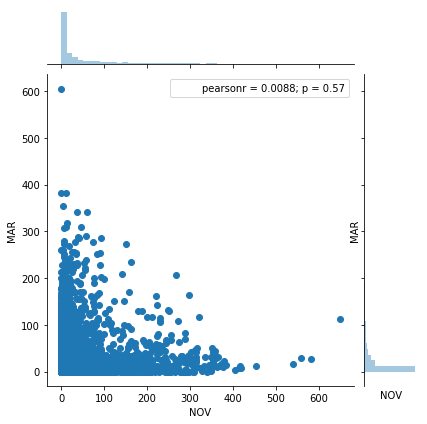

In [3]:
print(df[['NOV','MAR']].corr(method='pearson')) 
print(df[['NOV', 'MAR']].corr(method='spearman'))
sns.jointplot(x='NOV', y='MAR', data=df); 
plt.xlabel("NOV"); 
plt.ylabel("MAR"); 
plt.show();

Вывод: Корреляция - взаимосвязь случайных величин. Чем больше корреляция между признаками, тем больше зависимость между ними. Исходя из вычислений видно, что рассматриваемые признаки (месяцы март и ноябрь) являются некоррелирующими, т.к. коэфициент корреляции по Пирсону = 0,008; а по Спирману = 0,14.
Значение p-value рассматриваемых признаков = 0,58. Такое высокое значение обуславливается тем, что особенностью P-значений является их неустойчивость на эквивалентных выборках, что может стать препятствием для воспроизводимости результатов эксперимента, какими и являются данные выборки (количетсов осадков в рассматриваемые месяца в диффиринциальных штатах могут быть близкими друг к другу в зависимости  от климата штатов).